# Task 1: Referral performance

In [1]:
# Binary Classification into Non-referable glaucoma (NRG) and Referable glaucoma (RG)
# We used sensitivity at 95% specificity
#Steps:
# Algorithm will ouput the likelihood along with the labels
# Generte the ROC curve
# Find the 95% of specificity use the following formula 
   #False positive rate (fpr) = 1-specificity
# Pick the maximum senesitivity at calculated fpr

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc



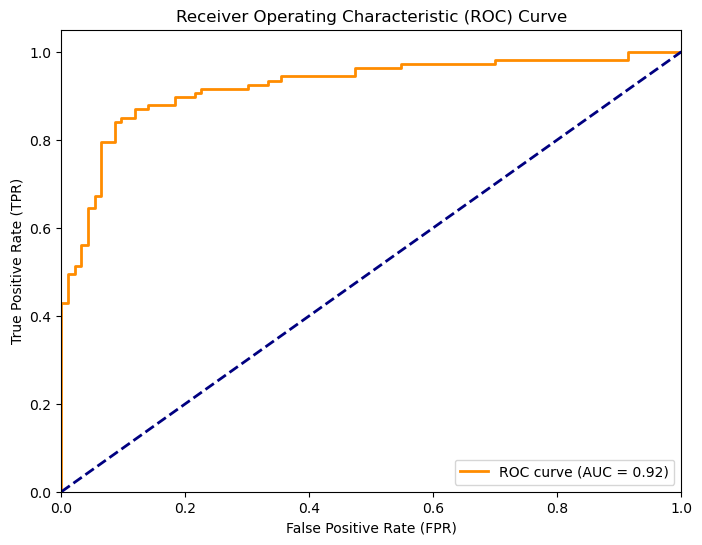

In [3]:
# Generate a synthetic dataset for binary classification
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get predicted probabilities 
y_pred_prob = model.predict_proba(X_test)[:,1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [4]:
# Desired specificity
desired_specificity = 0.95

# Find the index of the threshold that is closest to the desired specificity
idx = np.argmax(fpr >= (1 - desired_specificity))

# Get the corresponding threshold
threshold_at_desired_specificity = thresholds[idx]

print(f"Threshold at Specificity {desired_specificity*100:.2f}%: {threshold_at_desired_specificity:.4f}")

# Get the corresponding TPR (sensitivity)
sensitivity_at_desired_specificity = tpr[idx]

print(f"Sensitivity at Specificity {desired_specificity*100:.2f}%: {sensitivity_at_desired_specificity:.4f}")

Threshold at Specificity 95.00%: 0.7454
Sensitivity at Specificity 95.00%: 0.6449


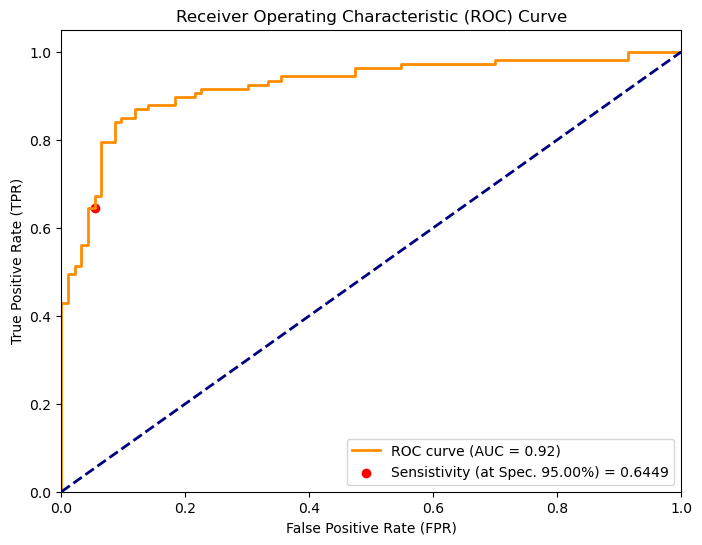

In [5]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Plot the sensitvity at 95% of specicifity 
plt.scatter(fpr[idx], tpr[idx], c='red', marker='o', label=f'Sensistivity (at Spec. {desired_specificity*100:.2f}%) = {sensitivity_at_desired_specificity:.4f}')

plt.legend(loc='lower right')
plt.show()